## Part 1

1.	Write down any 3 time series models that can be used for forecasting. (3 points)
- They are Autoregressive Integrated Moving Average (ARIMA), Exponential Smoothing, and Moving Averages.

2.	What are some real-world applications of time series forecasting? Name two. (2 points)
- Time series forecasting can be used to predict stock market prices and unemployment rate.

3.	What is the difference between a time series and a panel data set? (2 points)
- Time series dataset has observations on sample units with a single variable on different stamps. On the other hand, a panel datset has sample units and variables on different time stamps.

4.	What is the major difference in how we select training sets in time series machine learning tasks compared to regression/classification tasks? (2 marks)
- In regression/classification tasks, the order of data does not matter. On the other hand, in time series machine learning tasks, the training set needs to be order chronologically.

5.	Define the following terms as relates to time series models:
a.	Stationarity (1 point)
- A time series is stationary if it has no predictable pattern in the long-term.

b.	Differencing (1 point)
- Differencing is computing differences between consecutive observations to make a time series stationary.
 
c.	White noise (1 point)
- A white noise time series is when a series of observations are independently and identically distributed with a mean of 0 and constant variance.

d.	Random Walk (1 point)
- A random walk series is a series of observations where the current observations is the same as the previous observations with a random step up and down.

6.	Consider the following equation:
a.	Interpret the following equation terms in the above equation: c,  ,  ,  ,   (5 points)
- c is the equivalence of an intercept, epsilon_t is the error at time t, phi_i is the coefficient for lag i (ith order autocorrelation coefficient), theta_i is the coefficient for lag i (ith order movig average coefficient), and epsilon_(t-i) is the error moving average term.

b.	Can you tell from the above equation whether the time series has been differenced? Explain why or why not. (1 point)
- You can tell the time series has been differenced from t-i and the number of lags.

c.	What is the Autoregressive (AR) order in the above equation? How about the Moving Average (MA) order (2 points)
- Autoregressive order is 3, and Moving Average order is 4.

d.	How do you determine the AR and MA order? How do you know how many lags to include in your model? (2 points)
- You can use the ACF and PACF graphs to determine the number of lags to include in your model.


## Part 2

In [ ]:
# Python Version 3.9.13, conda version 22.9.0 (conda -V)

#### Import Modules

In [15]:
import pandas as pd # v 1.5.3
import numpy as np # v 1.21.5
import pmdarima as pm # v 2.0.3
import statsmodels.api as sm # v 0.13.2
import matplotlib.pyplot as plt # v 3.5.2
import pandas_profiling as pp # v 3.6.6
import sweetviz as sv # 3.5.2
import warnings as ww
import statsmodels.tsa.stattools as stattools # v 0.13.2

from statsmodels.tsa.stattools import adfuller # v 0.13.2
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # v 0.13.2
from statsmodels.tsa.arima_model import ARIMA # v 0.13.2

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

%matplotlib inline

/var/folders/cn/3_xbgw9n7w387jn918941b2w0000gn/T/ipykernel_58193/3302719460.py:6: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pp # v 3.6.6


In [16]:
ww.filterwarnings("ignore")
%matplotlib inline

#### 1. Read in the dataset

In [83]:
df = pd.read_csv(r"/Users/yelim/Documents/GitHub/DATA-300-Statistical-Machine-Learning-Fall-2023-/Data/Electric_Production.csv")

In [84]:
df["DATE"] = pd.to_datetime(df["DATE"]) # Python can now read this column as a date column.
df = df.sort_values("DATE") ## To arrange the data in chronological order 

In [85]:
df.head()

,DATE,IPG2211A2N
0,1985-01-01,72.5052
1,1985-02-01,70.6720
2,1985-03-01,62.4502
3,1985-04-01,57.4714
4,1985-05-01,55.3151


#### 2. ADF to check for stationarity

In [86]:
#### This function only returns the ADF value at the 5% significant level
def adfuller_test(timeseries):
    result=adfuller(timeseries)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )

    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
    else:
        print("weak evidence against null hypothesis,indicating it is non-stationary ")

In [87]:
for i in df.columns:
    print(i), adfuller_test(df[i])
    print()

DATE
ADF Test Statistic : -0.14017905755825988
p-value : 0.9452865588327521
#Lags Used : 12
Number of Observations : 384
weak evidence against null hypothesis,indicating it is non-stationary 

IPG2211A2N
ADF Test Statistic : -2.2569903500472432
p-value : 0.18621469116586814
#Lags Used : 15
Number of Observations : 381
weak evidence against null hypothesis,indicating it is non-stationary 



#### The test returns the ADF value at the 5% significant level. Based on the result, the p-value for electricity production is greater than 0.05. Therfore, we fail to reject the null hypothesis and the data is non-stationary. 

#### 3. Graphs

#### Plot raw variables

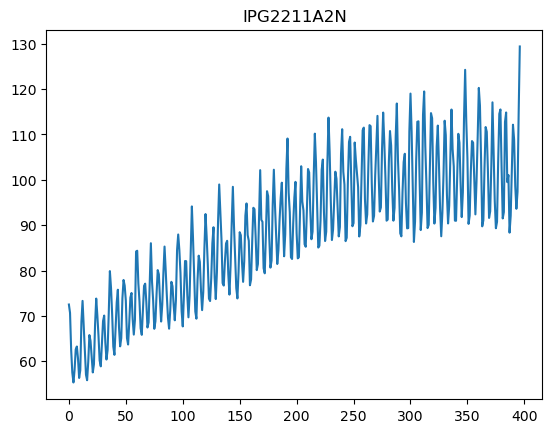

In [88]:
df = df[['IPG2211A2N']]

for i, col in enumerate(df.columns):
    df[col].plot(fig=plt.figure(i))
    plt.title(col)

plt.show()

#### Plot once differenced variables

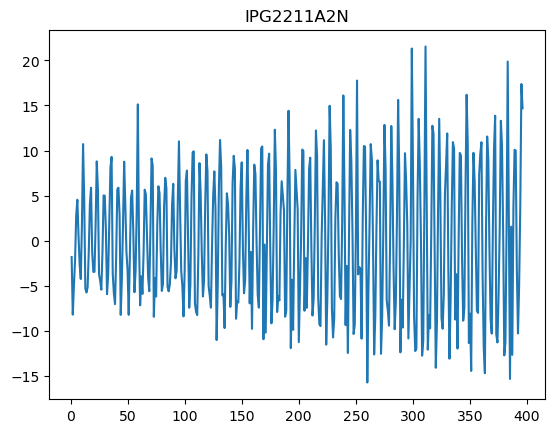

In [89]:
for i, col in enumerate(df.columns):
    df[col].diff().plot(fig=plt.figure(i))
    plt.title(col)

plt.show() # df[col].diff()

#### Plot twice differenced variables

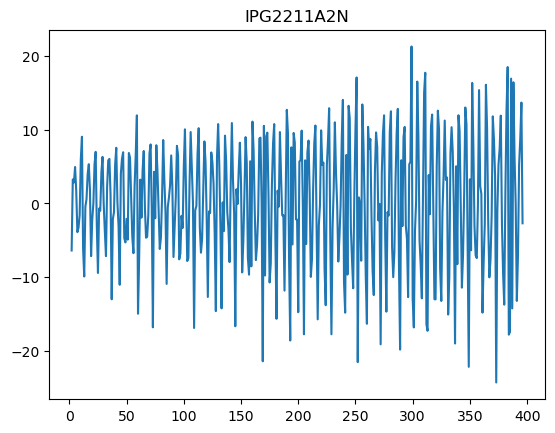

In [90]:
for i, col in enumerate(df.columns):
    df[col].diff().diff().plot(fig=plt.figure(i))
    plt.title(col)

plt.show() # df[col].diff().diff()

#### 4. 

In [91]:
def acf_pacf (series)-> plt.plot:
    return plot_acf(series), plot_pacf(series)

IPG2211A2N



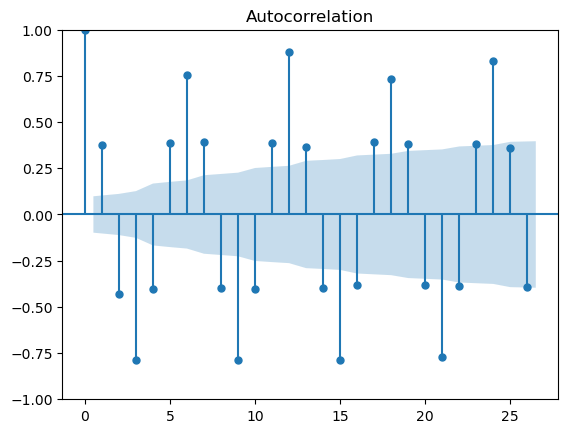

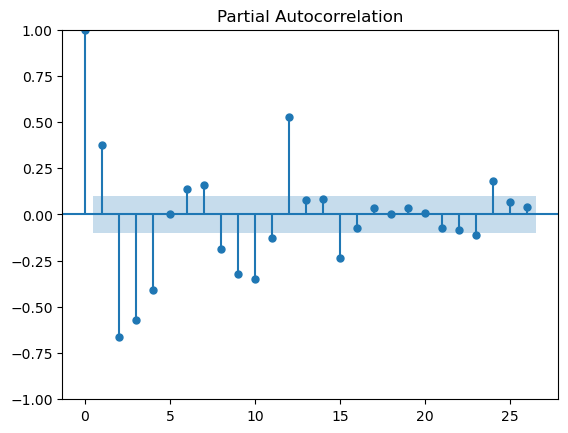

In [92]:
for i in df.columns:
    print(i)
    acf_pacf(df[i].diff().tail(len(df)-1))
    print()
    
    ## ARMA order is (4,23).

#### 5. 

#### (4,1,23)

#### 6. Fitting the model based on the training set (70% of the data)

In [93]:
df = df[['IPG2211A2N']]
model = sm.tsa.arima.ARIMA(df['IPG2211A2N'].diff().head(int(0.7*len(df))), order=(4, 1, 23))
results = model.fit()

In [94]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             IPG2211A2N   No. Observations:                  277
Model:                ARIMA(4, 1, 23)   Log Likelihood                -653.579
Date:                Mon, 02 Oct 2023   AIC                           1363.157
Time:                        13:41:01   BIC                           1464.529
Sample:                             0   HQIC                          1403.836
                                - 277                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5660      0.105     -5.397      0.000      -0.772      -0.360
ar.L2         -0.2155      0.055     -3.942      0.000      -0.323      -0.108
ar.L3         -0.7757      0.055    -14.042      0.000      -0.884      -0.667
ar.L4         -0.7783      0.083     -9.375      0.000      -0.941      -0.616
ma.L1         -0.7374      0.128     -5.749      0.000      -0.989      -0.486
ma.L2         -0.4345      0.195     -2.228      0.026      -0.817      -0.052
ma.L3          0.8303      0.162      5.121      0.000       0.513       1.148
ma.L4         -0.2217      0.153     -1.454      0.146      -0.521       0.077
ma.L5         -1.0303      0.151     -6.825      0.000      -1.326      -0.734
ma.L6          0.2378      0.138      1.718      0.086      -0.033       0.509
ma.L7          0.1907      0.135      1.416      0.157      -0.073       0.455
ma.L8         -0.1339      0.125     -1.075      0.282      -0.378       0.110
ma.L9          0.0963      0.106      0.906      0.365      -0.112       0.305
ma.L10         0.3042      0.124      2.456      0.014       0.061       0.547
ma.L11        -0.2253      0.131     -1.720      0.086      -0.482       0.032
ma.L12         0.6677      0.127      5.239      0.000       0.418       0.918
ma.L13        -0.0970      0.146     -0.663      0.507      -0.384       0.190
ma.L14        -0.6269      0.134     -4.675      0.000      -0.890      -0.364
ma.L15         0.4486      0.142      3.166      0.002       0.171       0.726
ma.L16         0.1678      0.140      1.203      0.229      -0.106       0.441
ma.L17        -0.6008      0.132     -4.541      0.000      -0.860      -0.341
ma.L18        -0.0581      0.126     -0.461      0.645      -0.305       0.189
ma.L19         0.1428      0.127      1.124      0.261      -0.106       0.392
ma.L20         0.2179      0.130      1.673      0.094      -0.037       0.473
ma.L21        -0.4186      0.093     -4.495      0.000      -0.601      -0.236
ma.L22         0.0688      0.131      0.523      0.601      -0.189       0.327
ma.L23         0.2543      0.104      2.448      0.014       0.051       0.458
sigma2         5.6444      0.700      8.060      0.000       4.272       7.017
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                 0.94
Prob(Q):                              0.80   Prob(JB):                         0.62
Heteroskedasticity (H):               1.70   Skew:                             0.12
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### 7. Forecast

In [104]:
df['IPG2211A2N_forecast']=results.predict(start = int(0.7*len(df))+1, end=len(df) , dynamic=True)

<AxesSubplot:>

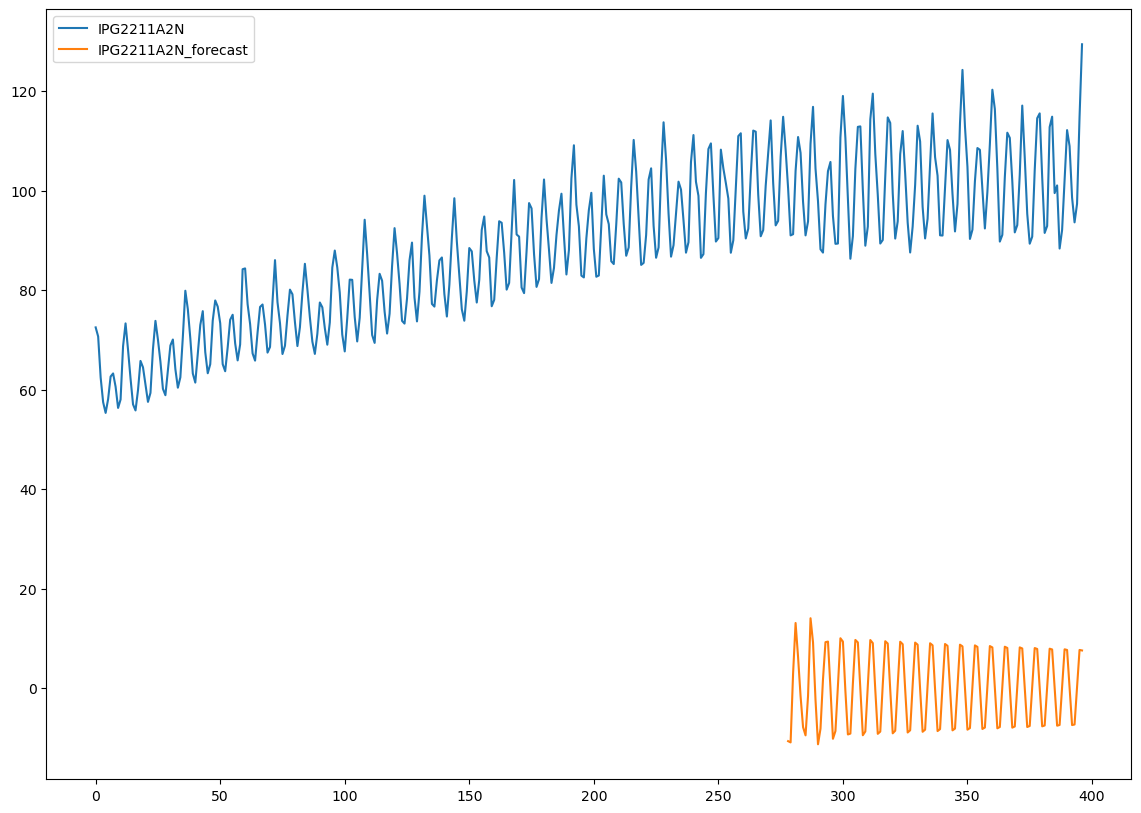

In [105]:
df[['IPG2211A2N','IPG2211A2N_forecast']].plot(figsize=(14,10))

#### 8.

In [99]:
mean_absolute_error(df['IPG2211A2N_forecast'].tail(int(0.3*len(df))),df['IPG2211A2N'].tail(int(0.3*len(df))))

101.85667134676719

In [100]:
mean_squared_error(df['IPG2211A2N_forecast'].tail(int(0.3*len(df))),df['IPG2211A2N'].tail(int(0.3*len(df))))

10432.380819689657

#### 9.

#### Based on the forecast, it is not a good model as the prediction is way off the actual data.